In [2]:
import matplotlib.pyplot as plt
import PIL
import numpy as np
import io
import pickle
import pandas as pd

def _imdecode(buf: bytes) -> np.ndarray:
    with io.BytesIO(buf) as fd:
        pil = PIL.Image.open(fd)
        return np.array(pil)


def _imshow(ax: plt.Axes, image_np: np.ndarray):
    ax.imshow(image_np)
    ax.axis('off')
    ax.set_autoscale_on(False)

In [3]:
# look at corresponding .py file if you want to extract all images with multiple walkers labeled
frame_number = 66
cam = 3
tfr_path = "/media/petbau/data/waymo/v1.3.2/individual_files/training/segment-9529958888589376527_640_000_660_000_with_camera_labels.tfrecord"

# night one 
# frame_number = 73
# cam = 3
# tfr_path = '/media/petbau/data/waymo/v1.3.2/individual_files/training/segment-11252086830380107152_1540_000_1560_000_with_camera_labels.tfrecord'

In [4]:
objs_id_list = ['8xtLDT_jhFhpb8MjgJ05fw', 'B7YV3XwQtG0zoKhERaw7dw', 'asCmONfXywbbDArlkkmQjg']

2022-07-06 15:22:18.363812: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /lhome/petbau/master_thesis/waymo_env/lib/python3.8/site-packages/cv2/../../lib64:
2022-07-06 15:22:18.363851: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1835] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-07-06 15:22:18.364629: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other o

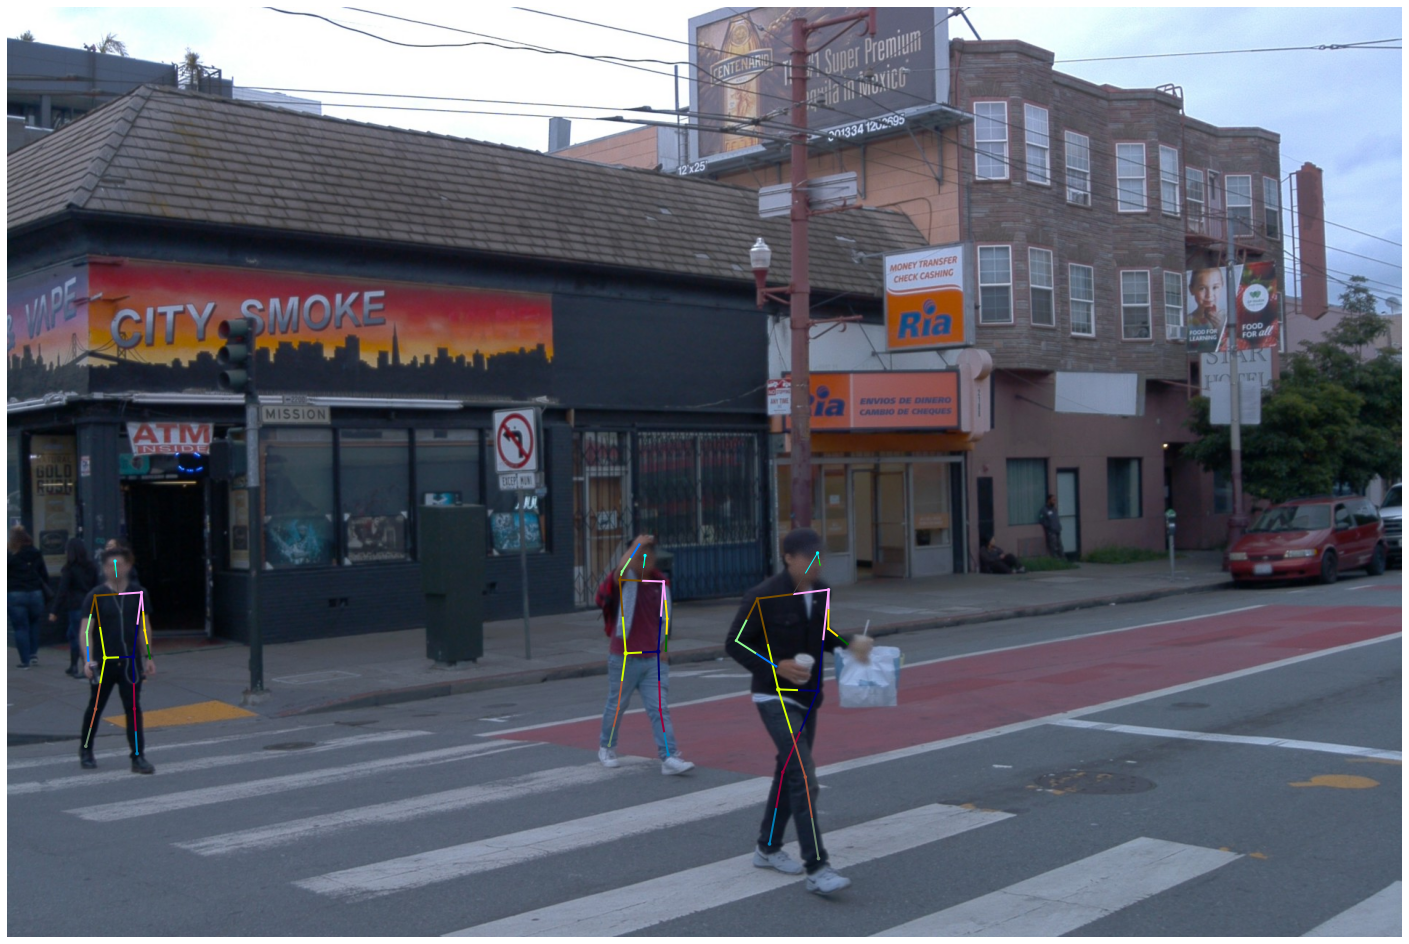

In [5]:

import tensorflow as tf
import cv2
from waymo_open_dataset.utils import keypoint_draw
from waymo_open_dataset import dataset_pb2
from waymo_open_dataset.utils import keypoint_data
from waymo_open_dataset import label_pb2


dataset = tf.data.TFRecordDataset(tfr_path, compression_type='')
frame_counter = 0
for data in dataset:
    if frame_counter == int(frame_number):
        frame = dataset_pb2.Frame()
        frame.ParseFromString(bytearray(data.numpy()))
        break
    frame_counter += 1

tfr_labels = keypoint_data.group_object_labels(frame)

# objs_id_list = []
# for id in tfr_labels:
#     obj = tfr_labels[id]
#     if obj.camera:
#         if  obj.object_type == label_pb2.Label.TYPE_PEDESTRIAN and cam in obj.camera:
#             objs_id_list.append(id) 

obj_labels_list = []
for obj_id in objs_id_list:
    obj_labels = tfr_labels[obj_id]
    obj_labels_list.append(obj_labels)

camera_image_by_name = {i.name: i.image for i in frame.images}

# display the images and save them to disk
image_np = _imdecode(camera_image_by_name[cam])
im_rgb = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
cv2.imwrite(f"/lhome/petbau/master_thesis/images_from_visualization/aa_blank_vis_one_picture.jpg", im_rgb)

# draw 2d keypoints on the image and save them to disk

keypoint_draw.OCCLUDED_BORDER_WIDTH = 0
_, ax = plt.subplots(frameon=False, figsize=(25, 25))
_imshow(ax, image_np)

for obj_labels in obj_labels_list:
    camera_wireframe = keypoint_draw.build_camera_wireframe(
        obj_labels.camera[cam].keypoints.keypoint)
    keypoint_draw.draw_camera_wireframe(ax, camera_wireframe)

plt.savefig(f"/lhome/petbau/master_thesis/images_from_visualization/aa_annotated_vis_one_picture.jpg")
#plt.close()
# create 3d GT plots | 3D PRED plots | 3D PRED & GT plots